# Biodata

**Fida Mardliyah // fidamardliyah11@gmail.com**

Sumber Data : https://www.kaggle.com/ishantjuyal/language-detection-dataset

# Import Data

In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('languages.csv')

In [4]:
data.head()

,text,language
0,ich denke es handelt sich hier um ein missvers...,german
1,ich habe tom gerade erst verlassen,german
2,tom versuchte mary nur zu ärgern,german
3,tom hat mir die hand geküsst,german
4,ich wusste dass dir das gefiele,german


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517287 entries, 0 to 517286
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      517287 non-null  object
 1   language  517286 non-null  object
dtypes: object(2)
memory usage: 7.9+ MB


In [6]:
data.shape

(517287, 2)

# Preprocessing

## Missing Value

In [7]:
data.isnull().values.any()

True

In [9]:
data.isnull().sum()

text        0
language    1
dtype: int64

In [10]:
data = data.dropna()

In [11]:
data.isnull().values.any()

False

## Label Desc

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

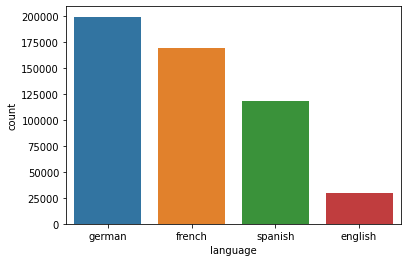

In [14]:
sns.countplot(x='language', data=data)

## One-Hot Encodding

In [17]:
language =pd.get_dummies(data.language)
datanew = pd.concat([data, language], axis=1)
datanew = datanew.drop(columns='language')
datanew

,text,english,french,german,spanish
0,ich denke es handelt sich hier um ein missvers...,0,0,1,0
1,ich habe tom gerade erst verlassen,0,0,1,0
2,tom versuchte mary nur zu ärgern,0,0,1,0
3,tom hat mir die hand geküsst,0,0,1,0
4,ich wusste dass dir das gefiele,0,0,1,0
...,...,...,...,...,...
517281,tom has his own life to live,1,0,0,0
517282,tom and mary were sitting when we came in,1,0,0,0
517283,do you have a pen or pencil,1,0,0,0
517284,tom fired once,1,0,0,0


In [18]:
text = datanew['text'].values
label = datanew[['english', 'french', 'german', 'spanish']].values

# Split Data

In [19]:
from sklearn.model_selection import train_test_split
text_train, text_val, label_train, label_val = train_test_split(text, label, test_size=0.2)

# Tokenizer & Sequences

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [21]:
tokenizer = Tokenizer(num_words=8000, oov_token='<OOV>')
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_val)

In [22]:
sequences_train = tokenizer.texts_to_sequences(text_train)
sequences_val = tokenizer.texts_to_sequences(text_val)

padded_train = pad_sequences(sequences_train) 
padded_val = pad_sequences(sequences_val)

# Modelling

In [23]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras.layers import Activation
from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## Sequential

In [24]:
model = Sequential([
    Embedding(input_dim=8000, output_dim=64),
    LSTM(32),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          512000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 128)               4224      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
Total params: 537,156
Trainable params: 537,156
Non-trainable params: 0
__________________________________________________

## Compile Optimizer

In [26]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

## Callbacks

In [27]:
class mycb(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if(logs.get('accuracy') >= 0.92 and logs.get('val_accuracy') >= 0.92):
      print('\nFor Epoch', epoch, '\nAccuracy has reach = %2.2f%%' %(logs['accuracy']*100), 'stop training.'),
      self.model.stop_training = True

# Fit Training

In [29]:
fitmodel = model.fit(padded_train, label_train,
                     steps_per_epoch = 25, epochs = 50, 
                     validation_data = (padded_val, label_val), validation_steps=5,
                     verbose=2, callbacks = [mycb()]
                     )

Epoch 1/50
25/25 - 165s - loss: 1.2098 - accuracy: 0.4226 - val_loss: 0.9478 - val_accuracy: 0.4892
Epoch 2/50
25/25 - 158s - loss: 0.5948 - accuracy: 0.8094 - val_loss: 0.2910 - val_accuracy: 0.9212
Epoch 3/50
25/25 - 157s - loss: 0.2180 - accuracy: 0.9302 - val_loss: 0.1374 - val_accuracy: 0.9347

For Epoch 2 
Accuracy has reach = 93.02% stop training.


# Perbandingan Plot

## Akurasi

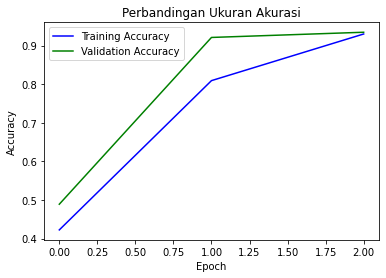

<Figure size 432x288 with 0 Axes>

In [30]:
epochs = range(len(fitmodel.history['accuracy']))

plt.plot(epochs, fitmodel.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(fitmodel.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

## Loss

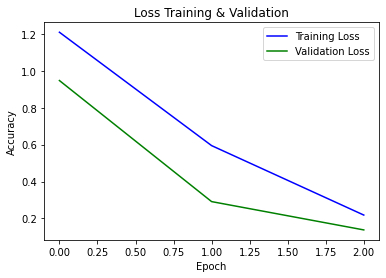

<Figure size 432x288 with 0 Axes>

In [31]:
plt.plot(epochs, fitmodel.history['loss'], label='Training Loss', color='blue')
plt.plot(epochs, fitmodel.history['val_loss'], label='Validation Loss', color = 'green')
plt.title('Loss Training & Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()